# Работа с HTTP-запросами

Большинство трафика в Интернете идет через протокол HTTP. Чтобы понять, что это такое, прежде всего приведем несколько определений:

**Протокол связи** — набор определённых правил или соглашений интерфейса логического уровня, который определяет обмен данными между различными программами. Эти правила задают единообразный способ передачи сообщений и обработки ошибок.

**Сетевой протокол** — набор правил и действий (очерёдности действий), позволяющий осуществлять соединение и обмен данными между двумя и более включёнными в сеть устройствами.

**Гипертекст** (англ. hypertext) — термин, обозначающий систему из текстовых страниц, имеющих перекрёстные ссылки, т.е. на каждой странице может располагаться ссылка на любую другую страницу.

**HTTP** (Hyper Text Transfer Protocol) — это протокол передачи гипертекста. Изначально использовался для передачи веб-страниц, но теперь по нему можно передавать любую информацию.

Чтобы пользоваться этим протоколом, нам не нужно лезть глубоко в детали его реализации, но мы должны уложить для себя несколько основных вещей. В первую очередь, это то, что в протоколе HTTP есть несколько видов запросов, называемых методами:

* GET - этот метод используют клиентские запросы, которые ожидают получить в ответ от сервера данные.
* POST - это метод используют клиентские запросы, которые не только ожидают получить данные от сервера в ответ, но и сами несут в себе какую-то дополнительную информацию для сервера.

Чаще всего используются вышеперечисленные два метода, и, в принципе, их достаточно для решения других задач. Но более "канонично" использовать все виды запросов, включая следующие:

* PUT - метод для отправки данных на сервер. Например, через него правильно отправлять картинки и прочие файлы с клиентского компьютера на сервер.
* DELETE - метод, предназначенный для того, чтобы обозначить, что клиент хочет удалить какие-то данные с сервера.
* HEAD - метод, запрашивающий заголовок ответа.
* PATCH - метод, предназначенный специально для модификации какого-то ресурса/объекта на сервере (например, в базе данных). Должен содержать только измененные поля. Предполагается, что изменяемый объект существует.

Подробно про методы можно почитать [тут](https://restapitutorial.ru/lessons/httpmethods.html).

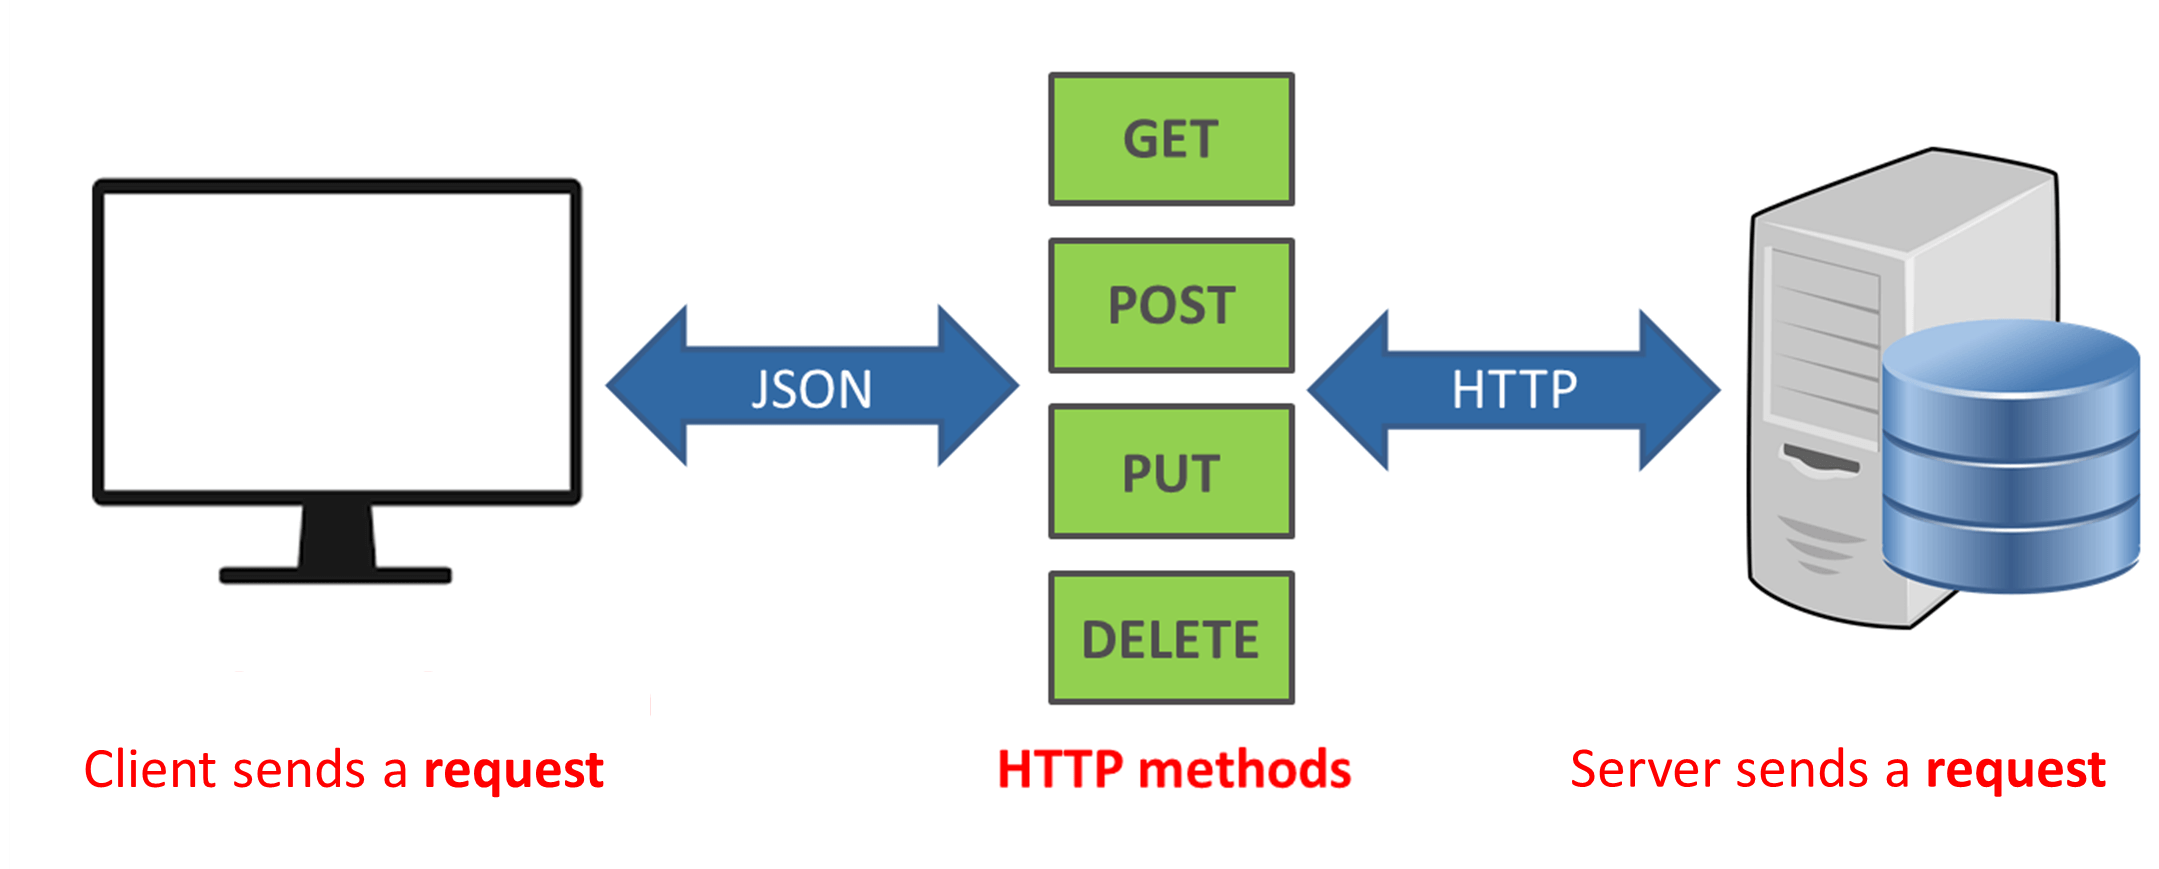

Каждый запрос должен быть **отправлен на конкретный URL**, т.е. адрес в сети. Допустим, на нашем сайте есть URL `oursite.ru/tasks`. Тогда, используя различные методы, мы можем отправлять разные запросы к серверу, используя только один URL:

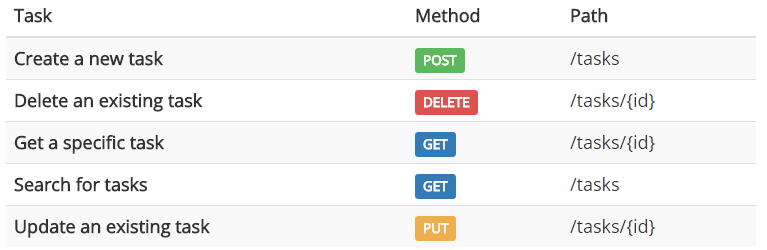

## Структура HTTP-запроса

Каждый запрос, построенный в соответствии с конвенцией протокола HTTP, должен включать следующие данные:

- метод
- адрес в сети (путь), по которому нужно отправить данные (URL)
- внутри URL либо отдельно также могут быть включены некоторые данные, которые мы хотим передать серверу в запросе
- протокол (в нашем случае HTTP) и его версия, чтобы сервер правильно понял, в каком порядке и в каком формате нужно считывать пришедший к нему набор нулей и единиц
- заголовки запроса. Например, можем описать, что данные закодированы в виде JSON-строк

Получив запрос, сервер генерирует и отправляет клиенту обратно ответ, который включает в себя:

- статус обработки запроса (например, число 200 означает, что всё ок, а числа 500-599 обозначают внутренние ошибки сервера). Полный список статусов можно посмотреть [в Википедии](https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%BA%D0%BE%D0%B4%D0%BE%D0%B2_%D1%81%D0%BE%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D1%8F_HTTP).
- данные ответа, закодированные, например, также в JSON


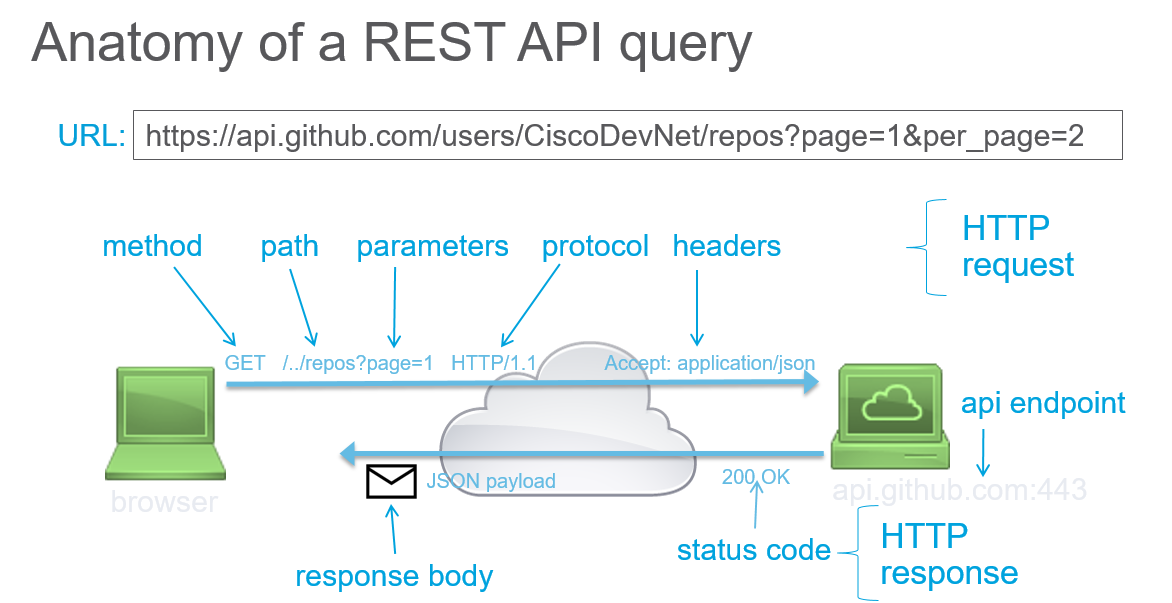


## Работа с запросами в Python

Раньше было тяжко. Приходилось использовать библиотеку urllib. Выглядело это так:

In [1]:
import urllib.request

with urllib.request.urlopen('http://www.python.org/') as f:
    print(f.read(300))  # выведем на экран первые 300 символов, которые пришли в ответе

b'<!doctype html>\n<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->\n<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->\n<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->\n<!--[if gt IE 8]><!--><html class="no-js"'


Этот метод дает возможность работать с результатом запроса как с файловым дескриптором, открытым с байтовом режиме. Можем задать кодировку, в которой будем обрабатывать информацию:

In [2]:
with urllib.request.urlopen('http://www.python.org/') as f:
    print(f.read(100).decode('utf-8'))

<!doctype html>
<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->
<!-


Либо использовать метод readlines:

In [3]:
resp = urllib.request.urlopen('http://www.python.org/')
resp.readlines()

[b'<!doctype html>\n',
 b'<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->\n',
 b'<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->\n',
 b'<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->\n',
 b'<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->\n',
 b'\n',
 b'<head>\n',
 b'    <meta charset="utf-8">\n',
 b'    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n',
 b'\n',
 b'    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">\n',
 b'    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jqueryui/1.12.1/jquery-ui.min.js">\n',
 b'\n',
 b'    <meta name="application-name" content="Python.org">\n',
 b'    <meta name="msapplication-tooltip" content="The official home of the Python Programming Language">\n',
 b'    <meta name="apple-mobile-web-app-title" content="Python.org">\n',
 b'    <meta name="apple-mobile-web-ap

В этом ответе мы видим HTML-разметку: теги, записанные в треугольных скобках, и их содержимое. Именно так в виде текстового документа и выглядят веб-страницы, которые мы открываем в браузере (браузер - это программа, через которую мы открываем веб-сайты). Мы уделим много времени работе с HTML-разметкой в модулях про веб-разработку.

### Небольшое объявление

Для воспроизведения работы последующего кода зайдите на сайт https://webhook.site и подставьте URL, который вам присвоит этот сайт, вместо тех адресов, которые записаны в ячейках с кодом.

---
А вот так можно отправить GET-запрос с параметрами:

In [4]:
# ссылка, чтоб посмотреть, что отправилось
# https://webhook.site/a91bae20-7d84-46d7-b3ed-abb8d4c3f6c1/ed4ee105-ffac-4081-b156-da971c0bbb7a/1

import urllib.parse

BASE_URL = "https://webhook.site/a91bae20-7d84-46d7-b3ed-abb8d4c3f6c1"

params = urllib.parse.urlencode({'spam': 1, 'eggs': 2, 'bacon': 0})
url = BASE_URL + "?%s" % params
print("Мы сформировали следующий URL:", url)
urllib.request.urlopen(url).close()

Мы сформировали следующий URL: https://webhook.site/a91bae20-7d84-46d7-b3ed-abb8d4c3f6c1?spam=1&eggs=2&bacon=0


В том окне, которое открылось при заходе на https://webhook.site, вы теперь можете увидеть результаты отправленных запросов. Там же показаны параметры, которые мы отправили на сервер с клиента (с нашего компьютера), заголовки и тип запроса.

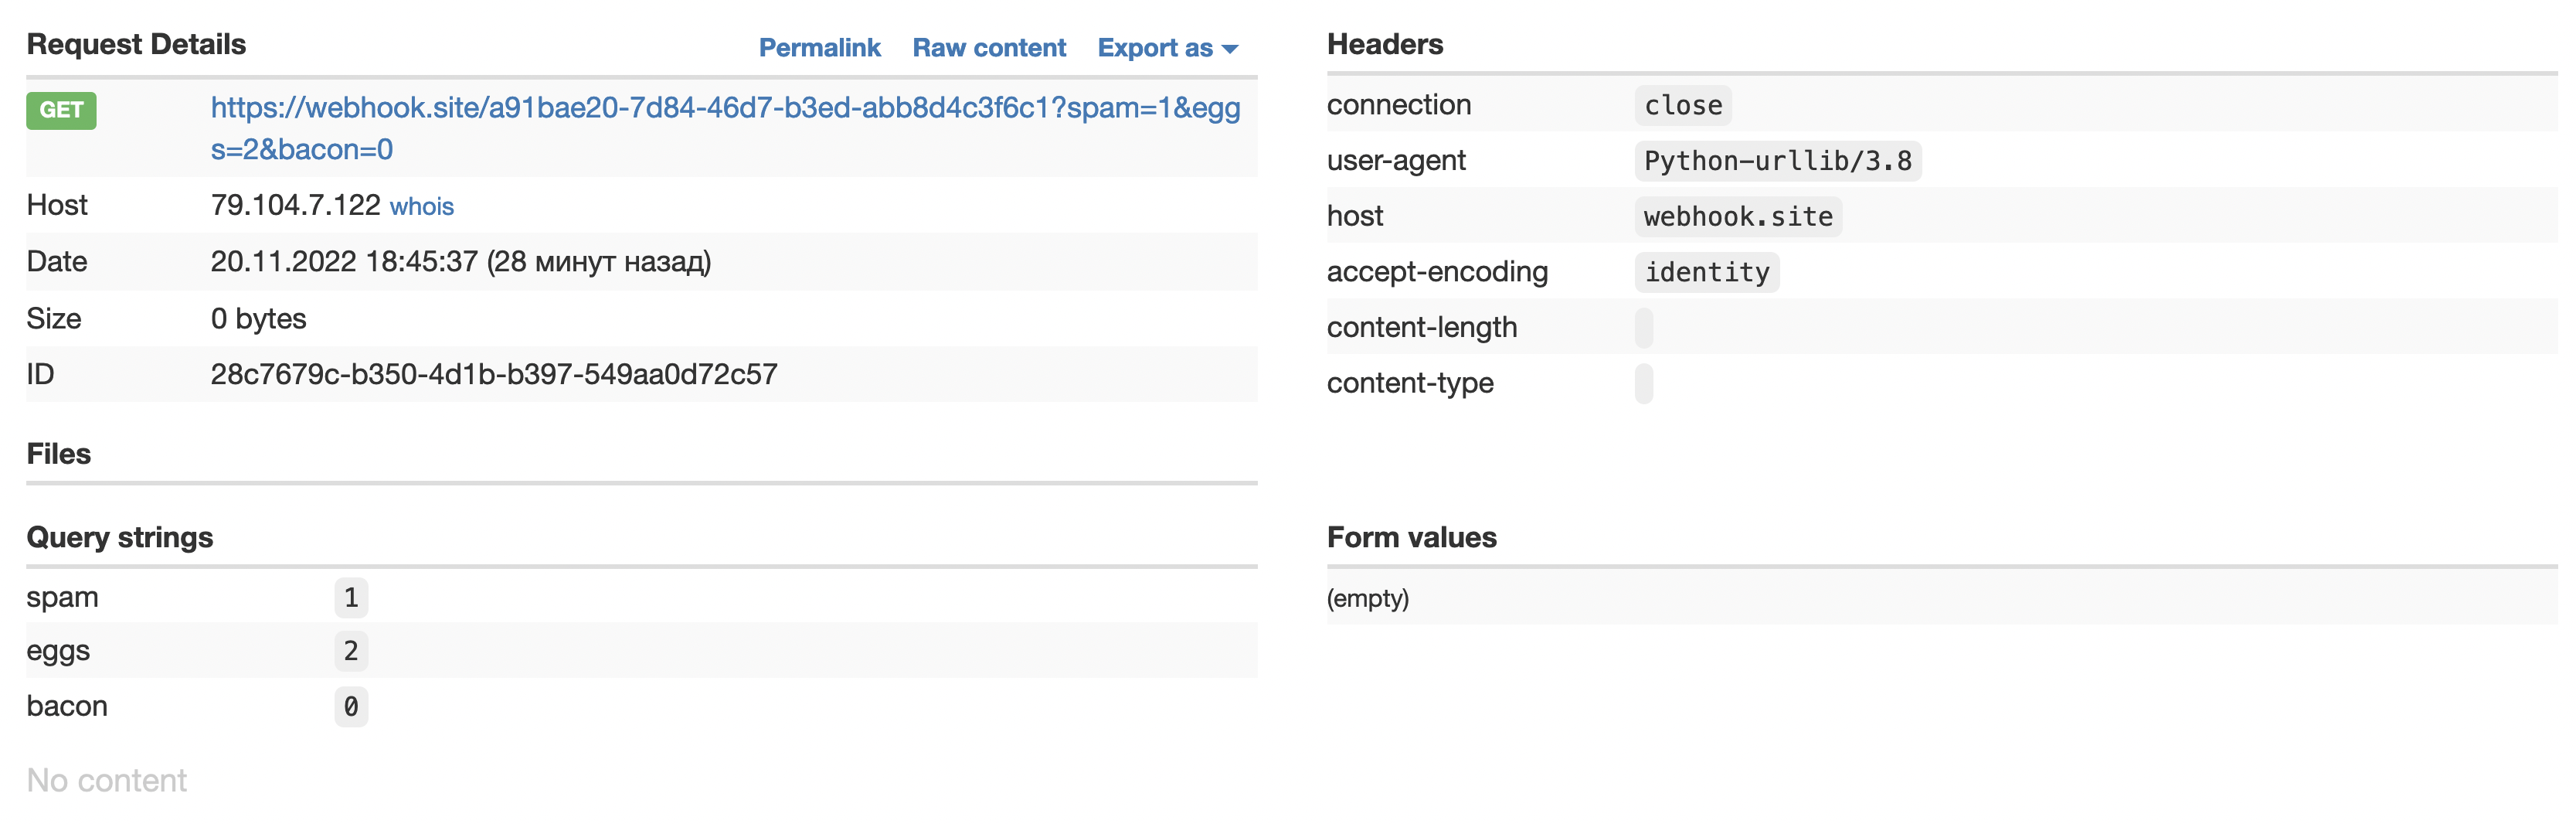

POST-запрос не передает параметры в явном виде, как GET, а скрывает их внутри запроса (поэтому пароли нужно передавать только так); формирование его в питоне выглядит так:

In [5]:
params = urllib.parse.urlencode({'spam': 1, 'eggs': 2, 'bacon': 0}).encode('utf-8')
urllib.request.urlopen(BASE_URL, params).close()

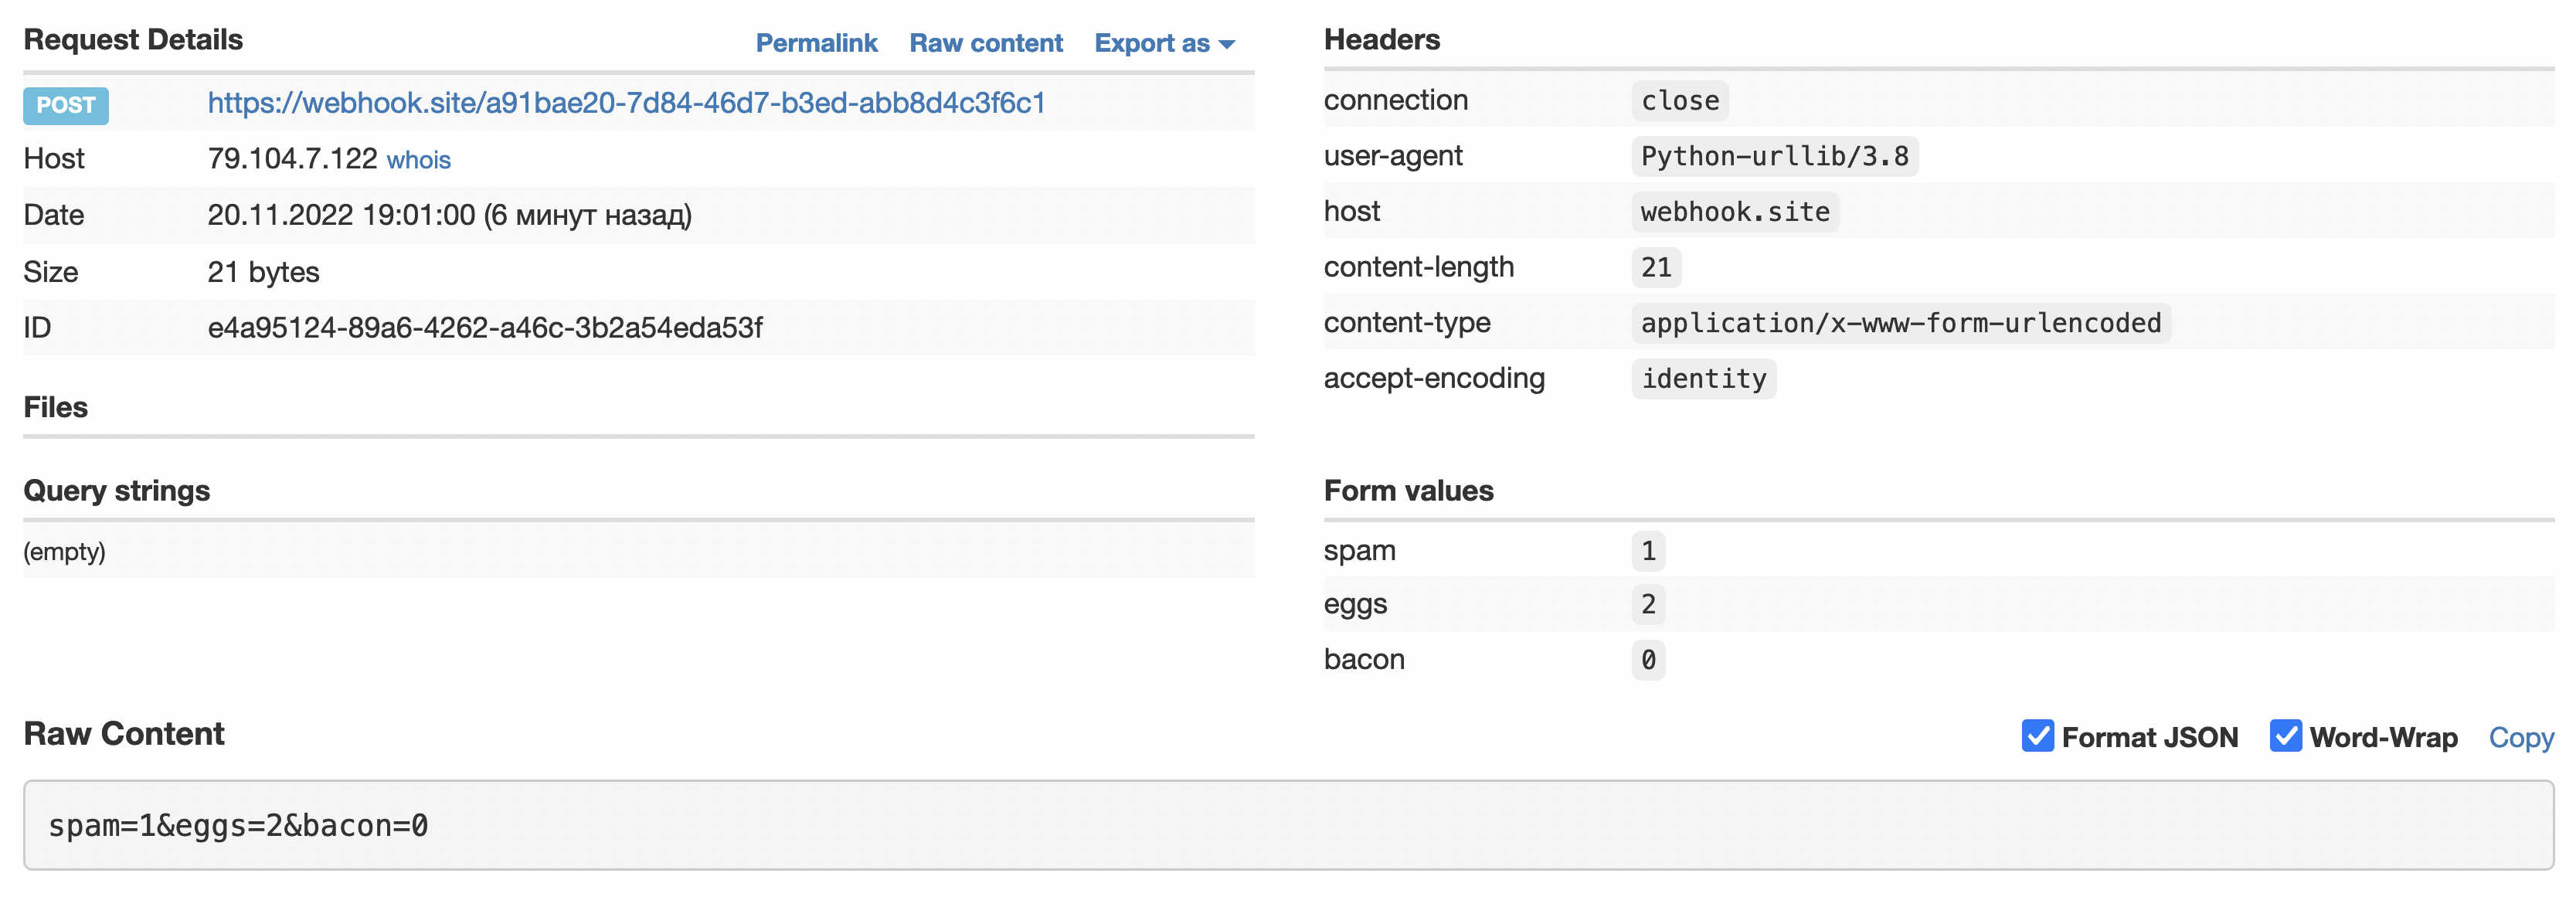

И, наконец, запрос с аутентификацией:

In [6]:
password_mgr = urllib.request.HTTPPasswordMgrWithDefaultRealm()
top_level_url = 'https://httpbin.org/basic-auth/user/passwd'
password_mgr.add_password(None, top_level_url, 'user', 'passwd')
handler = urllib.request.HTTPBasicAuthHandler(password_mgr)
opener = urllib.request.build_opener(handler)
response = opener.open(top_level_url)
response.getcode()

200

Если функция `getcode` возвращает 200, значит всё хорошо, и запрос отработал верно.

In [7]:
response.read()

b'{\n  "authenticated": true, \n  "user": "user"\n}\n'

In [8]:
response.close()

## Библиотека requests

Более удобный интерфейс взаимодействия с сетью по HTTP предоставляет библиотека requests.

In [9]:
import requests

### GET-запрос

Отправим GET-запрос

In [10]:
response = requests.get('https://httpbin.org/get')
print(response.content)

b'{\n  "args": {}, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.24.0", \n    "X-Amzn-Trace-Id": "Root=1-637bfe44-517f102208fc939435c40ae8"\n  }, \n  "origin": "5.228.89.72", \n  "url": "https://httpbin.org/get"\n}\n'


Можем посмотреть, какие параметры нам пришли в ответе:

In [11]:
response.json()

{'args': {},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.24.0',
  'X-Amzn-Trace-Id': 'Root=1-637bfe44-517f102208fc939435c40ae8'},
 'origin': '5.228.89.72',
 'url': 'https://httpbin.org/get'}

Также заголовки:

In [12]:
response.headers

{'Date': 'Mon, 21 Nov 2022 22:40:04 GMT', 'Content-Type': 'application/json', 'Content-Length': '305', 'Connection': 'keep-alive', 'Server': 'gunicorn/19.9.0', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true'}

In [13]:
response.headers.get('Server')

'gunicorn/19.9.0'

### POST-запрос

отправить так же просто:

In [14]:
response = requests.post(BASE_URL, data={"some_param": 124})

In [16]:
import json
s = json.dumps({"some_param": 123})
print(s)

response = requests.post(BASE_URL, json=s)

{"some_param": 123}


### Запрос с аутентификацией

In [15]:
import requests
response = requests.get('https://httpbin.org/basic-auth/user/passwd', auth=('user', 'passwd'))
print(response.content)
print(response.json())

b'{\n  "authenticated": true, \n  "user": "user"\n}\n'
{'authenticated': True, 'user': 'user'}


## Обработка исключений библиотеки requests

В библиотеке requests реализованы свои собственные типы исключений, дополняющие стандартный набор, поставляемый в питоне по умолчанию.

### Почему это важно?

Потому что работа с сетью - это то, что зависит не только от нашего кода, но и от ряда вещей, которые обязательно пойдут не так, как задумывалось. Например, сеть упадет или DNS-сервер отвалится. Это всё - исключительные ситуации, которые не хочется закладывать в стандартную логику работы кода, и для них в библиотеке requests предусмотрены исключения.

RequestException - базовое исключение, от которого отнаследованы:
* HTTPError
* ConnectionError
* Timeout
* SSLError
* ProxyError
* и т.д.

### Timeout

Возникает тогда, когда время ожидания запроса превысило установленное время. При этом запрос мы можем разделить на два этапа:
1. установка соединения с сервером;
2. передача данных по установленному соединению.

Соответственно, и вариантов ошибок таймаута соединения у нас тоже два:

* ConnectTimeout - таймаут соединения;
* ReadTimeout - таймаут на чтение данных.

Установить таймауты, отличные от значений по умолчанию, мы можем в функции отправки запроса в параметре timeout в виде кортежа из двух чисел - количества секунд, отведенных на каждый из этапов запроса.

In [17]:
response = requests.get('https://httpbin.org/user-agent', timeout=(0.00001, 10))

ConnectTimeout: HTTPSConnectionPool(host='httpbin.org', port=443): Max retries exceeded with url: /user-agent (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7feba061dee0>, 'Connection to httpbin.org timed out. (connect timeout=1e-05)'))

In [18]:
response = requests.get('https://httpbin.org/user-agent', timeout=(10, 0.0001))

ReadTimeout: HTTPSConnectionPool(host='httpbin.org', port=443): Read timed out. (read timeout=0.0001)

### ConnectionError

Возникает, когда не получается подключиться к серверу, например, сервер DNS не может дать правильный адрес запрашиваемого сервера. DNS-сервер - это специальный сервер, который сопоставляет буквенный адрес сайта с цифровым IP.

In [19]:
requests.get('http://urldoesnotexistforsure.bom')  # такой домен нигде не зарегистрирован, и найти его нельзя

ConnectionError: HTTPConnectionPool(host='urldoesnotexistforsure.bom', port=80): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7feb700f2550>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))

### HTTPError

Не возникает сама по себе, ее нужно вызвать специальным методом <code>raise_for_status</code>, чтобы ошибки сервера использовать как ошибки программы. Если в алгоритме работы сервера происходит внутренняя ошибка, он сообщает об этом 500-ми кодами ответа. Т.е. любой код ответа, который начинается с 5__, это ошибка, произошедшая на сервере.

In [20]:
response = requests.get('https://httpbin.org/status/500')

In [21]:
response.status_code

500

In [22]:
try:
    response = requests.get('https://httpbin.org/status/500')
    response.raise_for_status()
except requests.exceptions.HTTPError as err:
    print('Oops. HTTP Error occured')
    print('Response is: {content}'.format(content=err.response.content))

Oops. HTTP Error occured
Response is: b''


Для удачного ответа на запрос исключение не будет поднято:

In [23]:
try:
    response = requests.get('https://httpbin.org/status/200')
    response.raise_for_status()
except requests.exceptions.HTTPError as err:
    print('Oops. HTTP Error occured')
    print('Response is: {content}'.format(content=err.response.content))

### Как скачать файл

У функции <code>get</code> есть параметр <code>stream</code>, который позволяет использовать ответ как файловый дескриптор:

In [24]:
import requests
import shutil

r = requests.get('https://httpbin.org/get', stream=True)
if r.status_code == 200:
    with open("16/get_query_result.txt", 'wb') as f:
        r.raw.decode_content = True
        shutil.copyfileobj(r.raw, f)  

In [25]:
with open("16/get_query_result.txt", 'r', encoding='utf-8') as f:
    print(f.read())

{
  "args": {}, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.24.0", 
    "X-Amzn-Trace-Id": "Root=1-637c00d1-3e797f7761ca5e2971505747"
  }, 
  "origin": "5.228.89.72", 
  "url": "https://httpbin.org/get"
}



# Задание

[Здесь](https://jsonplaceholder.typicode.com/) описано некоторое API, в котором есть доступ к базе пользователей, постов, комментариев и т.д. Методы, которые мы будем использовать, описаны в разделе Resources. Примеры использования API (правда, на JavaScript'е) описаны на том же сайте по ссылке [Guide](https://jsonplaceholder.typicode.com/guide/). Вам нужно для каждого пользователя посчитать количество оставленных постов и количество оставленных комментариев. Всю информацию для этого нужно стягивать GET-запросами по API. Результат нужно отправить в ваше пространство в https://webhook.site в виде POST-запроса, содержащего JSON следующего формата:

```{
  "statistics": [
    {
      "id": 1,
      "username": "lolkek",
      "email": "user1@mail.dot",
      "posts": 125,
      "comments": 1358
    },
    {
      "id": 2,
      "username": "cheburek",
      "email": "user2@mail.dot",
      "posts": 5,
      "comments": 12
    }
  ]
}```

Поскольку среда исполнения Яндекс-контеста не имеет доступа к интернету, проверить правильность выполнения задания вы можете, отправив в качестве ответа на задание "Сеть" pickle объекта ответа запроса:

```response = requests.post(.....)
with open("solution.pickle", 'wb') as f:
    pickle.dump(response, "solution.py")```
    
И отправляйте тот файл, который появится в результате исполнения этого кода.

In [ ]:
# ваше решение здесь

